TITANIC SURVIVAL PROJECT FINAL

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
warnings.filterwarnings('ignore') 


In [2]:
train = pd.read_csv('Titanic_Dataset.csv') 
test = pd.read_csv('test.csv') 

# To know number of columns and rows 
train.shape 
# (891, 12) 


(891, 12)

In [3]:

train.info() 
train.isnull().sum() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let us first visualize the number of survivors and death counts.

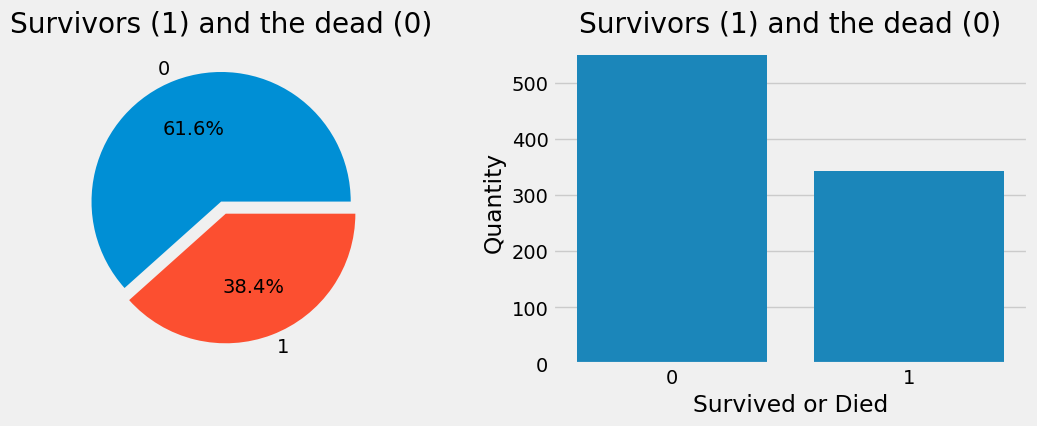

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survived'].value_counts().plot.pie( 
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived',data=train ,ax=ax[1]) 
ax[1].set_xlabel('Survived or Died')
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show() 


Sex feature

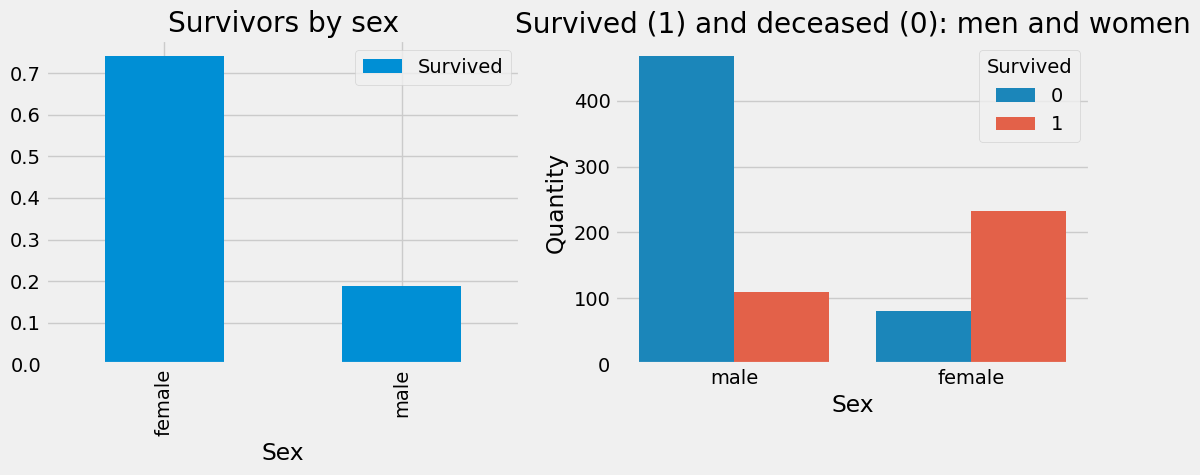

In [5]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 


Feature Engineering

drop the Ticket feature

In [6]:
train = train.drop(['Ticket'], axis=1) 
test = test.drop(['Ticket'], axis=1) 


In [7]:
# replacing the missing values in 
# the Embarked feature with S 
train = train.fillna({"Embarked": "S"}) 


In [8]:
# sort the ages into logical categories 
train["Age"] = train["Age"].fillna(-0.5) 
test["Age"] = test["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 28, 55, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
		'Young Adult', 'Adult', 'Senior'] 
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels) 
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels) 


In [9]:
# map each Age value to a numerical value 
age_mapping = {'Unknown': 0 ,'Baby': 1, 'Child': 2, 'Teenager': 3, 
			'Young Adult': 4, 'Adult': 5, 
			'Senior': 6} 
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) 
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) 

train.head() 

# dropping the Age feature for now, might change 
train = train.drop(['Age'], axis=1) 
test = test.drop(['Age'], axis=1) 


In [10]:
#Drop the name feature
train = train.drop(['Name'], axis=1) 
test = test.drop(['Name'], axis=1) 


In [11]:
#Assign numerical values to sex and embarks categories
sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping) 
test['Sex'] = test['Sex'].map(sex_mapping) 

embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train['Embarked'] = train['Embarked'].map(embarked_mapping) 
test['Embarked'] = test['Embarked'].map(embarked_mapping) 


In [12]:
for x in range(len(test["Fare"])): 
	if pd.isnull(test["Fare"][x]): 
		pclass = test["Pclass"][x] # Pclass = 3 
		test["Fare"][x] = round( 
			train[train["Pclass"] == pclass]["Fare"].mean(), 4) 

# map Fare values into groups of 
# numerical values 
train['FareBand'] = pd.qcut(train['Fare'], 4, 
							labels=[1, 2, 3, 4]) 
test['FareBand'] = pd.qcut(test['Fare'], 4, 
						labels=[1, 2, 3, 4]) 

# drop Fare values 
train = train.drop(['Fare'], axis=1) 
test = test.drop(['Fare'], axis=1) 


Model Training

In [13]:
from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train.drop(['Survived', 'PassengerId','Cabin'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
	predictors, target, test_size=0.2, random_state=0) 


In [14]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 


84.36


With this, we got an accuracy of 83.25%

In [15]:
import pickle

# Save the model to a file
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(randomforest, file)

print("Model saved as titanic_model.pkl")


Model saved as titanic_model.pkl
